In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2.0)
sns.set_palette("magma")
import pylab
pylab.rcParams['figure.figsize'] = (15, 9)
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
today=datetime.today()
today_file=str(today.year) +'-' + str(today.month) + '-'+ str(today.day)
today_graph=datetime.strptime(today_file, '%Y-%m-%d').strftime('%B %d, %Y')

In [2]:
df = pd.read_csv('./data/daniel_imdb_ratings_february_22_2023.csv',index_col='Date Rated',parse_dates = True,encoding = "ISO-8859-1")


In [3]:
df['Title Type'].value_counts()

movie           545
tvSeries         34
tvEpisode        24
tvMiniSeries     12
videoGame         6
video             4
tvMovie           2
short             1
Name: Title Type, dtype: int64

In [4]:
movie = df[df['Title Type'] == 'movie']

In [8]:
today_graph

'February 25, 2023'

In [9]:
df.head(7)

,Const,Your Rating,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
Date Rated,,,,,,,,,,,,
2021-02-26,tt10016180,4,The Little Things,https://www.imdb.com/title/tt10016180/,movie,6.3,128.0,2021,"Crime, Drama, Mystery, Thriller",108320,2021-01-28,John Lee Hancock
2021-12-05,tt10023286,8,The Humans,https://www.imdb.com/title/tt10023286/,movie,6.2,108.0,2021,Drama,8795,2021-09-12,Stephen Karam
2022-11-27,tt0100403,5,Predator 2,https://www.imdb.com/title/tt0100403/,movie,6.3,108.0,1990,"Action, Horror, Sci-Fi",172273,1990-11-19,Stephen Hopkins
2020-11-21,tt10048342,8,The Queen's Gambit,https://www.imdb.com/title/tt10048342/,tvMiniSeries,8.6,60.0,2020,Drama,470076,2020-10-23,NaN
2011-03-19,tt1010048,9,Slumdog Millionaire,https://www.imdb.com/title/tt1010048/,movie,8.0,120.0,2008,"Crime, Drama, Romance",852041,2008-08-30,"Loveleen Tandan, Danny Boyle"
2011-03-19,tt1013753,8,Milk,https://www.imdb.com/title/tt1013753/,movie,7.5,128.0,2008,"Biography, Drama, History",174908,2008-10-28,Gus Van Sant
2021-10-17,tt10155688,8,Mare of Easttown,https://www.imdb.com/title/tt10155688/,tvMiniSeries,8.4,60.0,2021,"Crime, Drama, Mystery",162656,2021-04-18,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 628 entries, 2021-02-26 to 2011-09-16
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Const           628 non-null    object 
 1   Your Rating     628 non-null    int64  
 2   Title           628 non-null    object 
 3   URL             628 non-null    object 
 4   Title Type      628 non-null    object 
 5   IMDb Rating     628 non-null    float64
 6   Runtime (mins)  622 non-null    float64
 7   Year            628 non-null    int64  
 8   Genres          628 non-null    object 
 9   Num Votes       628 non-null    int64  
 10  Release Date    628 non-null    object 
 11  Directors       582 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 63.8+ KB


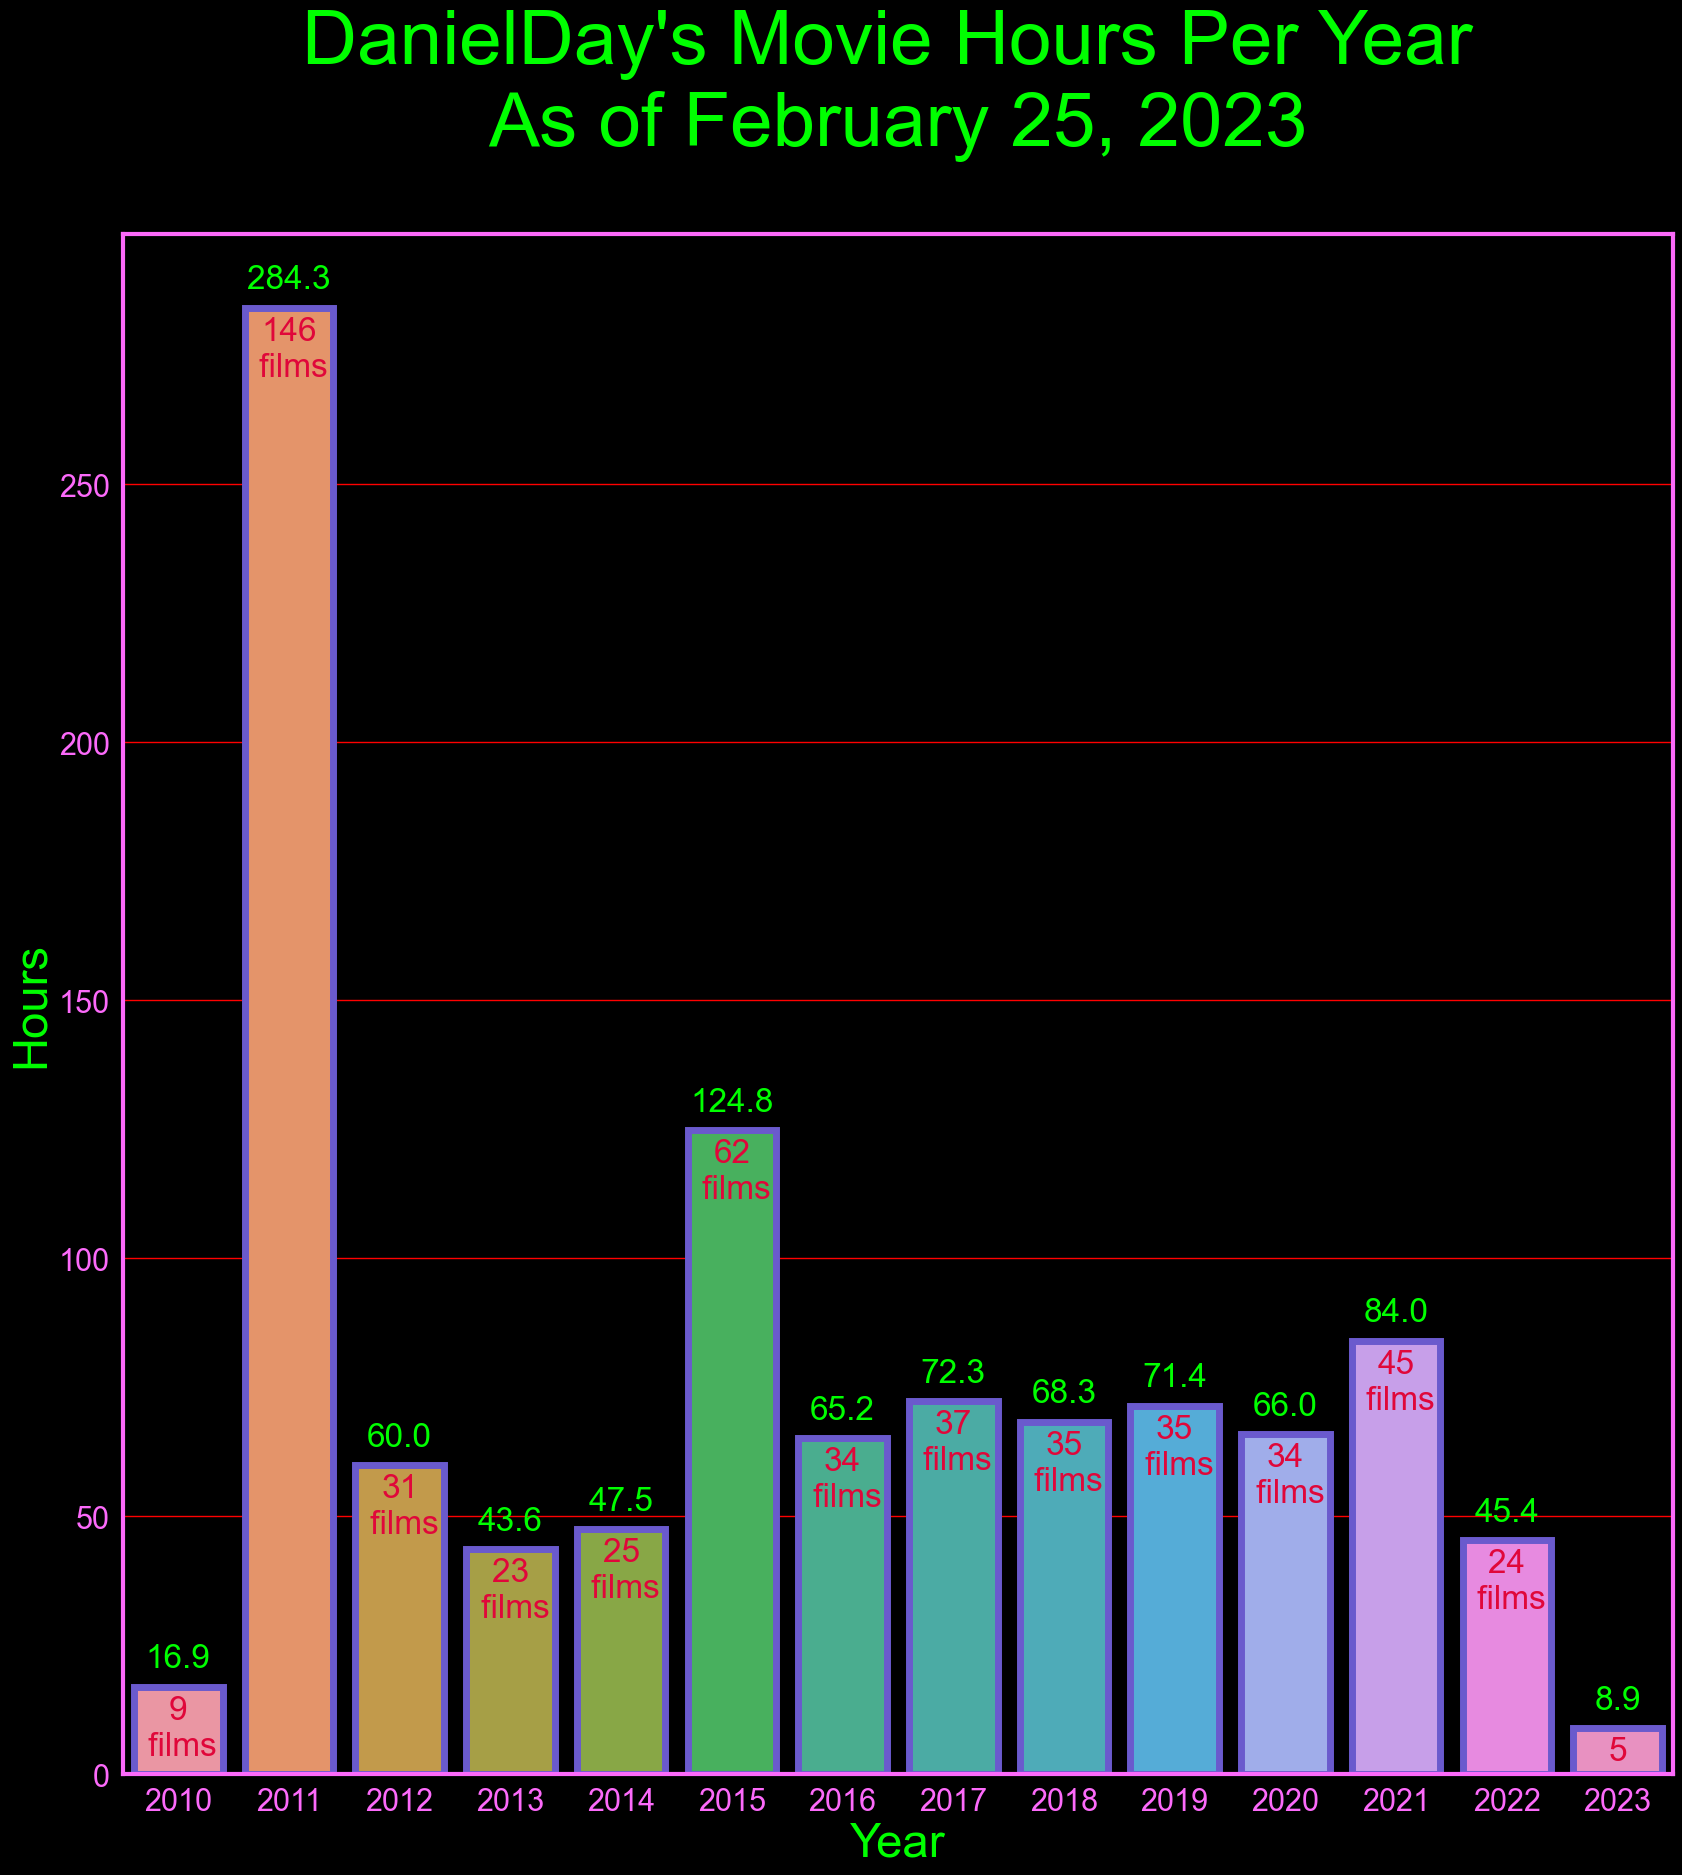

In [11]:
movie = df[df['Title Type'] == 'movie']
year_total_mins=movie.resample('Y').sum()['Runtime (mins)']
fig=plt.figure(figsize=(20,20))

g=sns.barplot(x=year_total_mins.index.year, y=year_total_mins/60,edgecolor='slateblue')
g.set_title(f"DanielDay's Movie Hours Per Year \nAs of {today_graph}\n",size=55,color='lime')
g.set_xlabel('Year',size=34,color='lime')
g.set_ylabel('Hours',size=34,color='lime')
g.grid(axis='y',color='red')

plt.setp(g.patches, linewidth=5) #change bar width

#color the axis and tick labels
g.spines['bottom'].set_color('#fc6afa')
g.spines['right'].set_color('#fc6afa')
g.spines['top'].set_color('#fc6afa')
g.spines['left'].set_color('#fc6afa')

g.tick_params(axis='x', colors='#fc6afa')
g.tick_params(axis='y', colors='#fc6afa')
#color the axis and tick labels
g.spines['left'].set_linewidth(3)
g.spines['right'].set_linewidth(3)
g.spines['bottom'].set_linewidth(3)
g.spines['top'].set_linewidth(3)


# Hours per Year Text Above
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 20),
               textcoords = 'offset points',color='lime')

    # Inside bar: movie Count
# movie.resample('Y').count()['Title']
movie_count = movie.resample('Y').count()['Title']
for p,movie_countx in zip(g.patches,movie_count):
    if movie_countx >= 9:
        g.annotate(format(str(movie_countx)+'\n films'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, -30),
                   textcoords = 'offset points',color='#e0073a')
    else:
        g.annotate(format(str(movie_countx)+'\n'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, -30),
                   textcoords = 'offset points',color='#e0073a')
# plt.savefig(f"{today_file}_ratings.png")

In [12]:
movie

,Const,Your Rating,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
Date Rated,,,,,,,,,,,,
2021-02-26,tt10016180,4,The Little Things,https://www.imdb.com/title/tt10016180/,movie,6.3,128.0,2021,"Crime, Drama, Mystery, Thriller",108320,2021-01-28,John Lee Hancock
2021-12-05,tt10023286,8,The Humans,https://www.imdb.com/title/tt10023286/,movie,6.2,108.0,2021,Drama,8795,2021-09-12,Stephen Karam
2022-11-27,tt0100403,5,Predator 2,https://www.imdb.com/title/tt0100403/,movie,6.3,108.0,1990,"Action, Horror, Sci-Fi",172273,1990-11-19,Stephen Hopkins
2011-03-19,tt1010048,9,Slumdog Millionaire,https://www.imdb.com/title/tt1010048/,movie,8.0,120.0,2008,"Crime, Drama, Romance",852041,2008-08-30,"Loveleen Tandan, Danny Boyle"
2011-03-19,tt1013753,8,Milk,https://www.imdb.com/title/tt1013753/,movie,7.5,128.0,2008,"Biography, Drama, History",174908,2008-10-28,Gus Van Sant
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,tt9812474,5,DÃ½riÃ°,https://www.imdb.com/title/tt9812474/,movie,6.3,106.0,2021,"Drama, Fantasy, Horror",30544,2021-07-13,Valdimar JÃ³hannsson
2021-05-31,tt0993840,2,Army of the Dead,https://www.imdb.com/title/tt0993840/,movie,5.7,148.0,2021,"Action, Crime, Drama, Horror, Sci-Fi, Thriller...",175765,2021-05-14,Zack Snyder
2015-01-04,tt0993846,9,The Wolf of Wall Street,https://www.imdb.com/title/tt0993846/,movie,8.2,180.0,2013,"Biography, Comedy, Crime, Drama",1433153,2013-12-09,Martin Scorsese


In [13]:
movie_count

Date Rated
2010-12-31      9
2011-12-31    146
2012-12-31     31
2013-12-31     23
2014-12-31     25
2015-12-31     62
2016-12-31     34
2017-12-31     37
2018-12-31     35
2019-12-31     35
2020-12-31     34
2021-12-31     45
2022-12-31     24
2023-12-31      5
Freq: A-DEC, Name: Title, dtype: int64

In [14]:
df['Title Type'].value_counts()

movie           545
tvSeries         34
tvEpisode        24
tvMiniSeries     12
videoGame         6
video             4
tvMovie           2
short             1
Name: Title Type, dtype: int64

In [15]:
# validated counts
df[df['Title Type'].apply(lambda x : x in ['tvSeries','tvMiniSeries'])].sort_values(by='Your Rating',ascending=False)

,Const,Your Rating,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
Date Rated,,,,,,,,,,,,
2015-02-01,tt0979432,10,Boardwalk Empire,https://www.imdb.com/title/tt0979432/,tvSeries,8.6,55.0,2010,"Crime, Drama",192351,2010-09-19,NaN
2014-08-29,tt0944947,10,Game of Thrones,https://www.imdb.com/title/tt0944947/,tvSeries,9.2,57.0,2011,"Action, Adventure, Drama, Fantasy",2128730,2011-04-16,NaN
2013-09-16,tt0903747,10,Breaking Bad,https://www.imdb.com/title/tt0903747/,tvSeries,9.5,49.0,2008,"Crime, Drama, Thriller",1927540,2008-01-20,NaN
2019-06-09,tt7366338,10,Chernobyl,https://www.imdb.com/title/tt7366338/,tvMiniSeries,9.4,330.0,2019,"Drama, History, Thriller",774981,2019-05-06,NaN
2019-12-18,tt7049682,10,Watchmen,https://www.imdb.com/title/tt7049682/,tvSeries,8.2,527.0,2019,"Crime, Drama, Mystery, Sci-Fi",123264,2019-10-20,NaN
2015-07-07,tt2802850,9,Fargo,https://www.imdb.com/title/tt2802850/,tvSeries,8.9,53.0,2014,"Crime, Drama, Thriller",378545,2014-04-15,NaN
2018-11-11,tt6763664,9,The Haunting of Hill House,https://www.imdb.com/title/tt6763664/,tvMiniSeries,8.6,572.0,2018,"Drama, Horror, Mystery, Thriller",251714,2018-10-07,NaN
2020-02-23,tt5348176,9,Barry,https://www.imdb.com/title/tt5348176/,tvSeries,8.4,30.0,2018,"Action, Comedy, Crime, Drama",86381,2018-03-09,NaN
2019-05-08,tt5290382,9,Mindhunter,https://www.imdb.com/title/tt5290382/,tvSeries,8.6,60.0,2017,"Crime, Drama, Mystery, Thriller",297173,2017-10-13,NaN


In [16]:
print(datetime.today())

2023-02-25 02:30:08.092773


In [17]:
list(df[df['Title Type'].apply(lambda x : x in ['tvSeries','tvMiniSeries'])].sort_values(by='Your Rating',ascending=False)['Const'].values
)

['tt0979432',
 'tt0944947',
 'tt0903747',
 'tt7366338',
 'tt7049682',
 'tt2802850',
 'tt6763664',
 'tt5348176',
 'tt5290382',
 'tt5071412',
 'tt3032476',
 'tt4508902',
 'tt0206512',
 'tt2243973',
 'tt0460649',
 'tt12005128',
 'tt8134470',
 'tt8134186',
 'tt7423538',
 'tt13207736',
 'tt14164730',
 'tt6517102',
 'tt6205862',
 'tt1796960',
 'tt10048342',
 'tt4574334',
 'tt0412142',
 'tt2788432',
 'tt10155688',
 'tt1856010',
 'tt2249007',
 'tt3920596',
 'tt13837672',
 'tt7335184',
 'tt1520211',
 'tt0773262',
 'tt2575988',
 'tt2401256',
 'tt0898266',
 'tt2356777',
 'tt10166622',
 'tt5675620',
 'tt4158110',
 'tt14852808',
 'tt0844441',
 'tt8550800']

In [18]:
df[df['Title Type'].apply(lambda x : x in ['tvSeries','tvMiniSeries'])].sort_values(by='Your Rating',ascending=False)[[
    'Const', 'Title'
]]


,Const,Title
Date Rated,,
2015-02-01,tt0979432,Boardwalk Empire
2014-08-29,tt0944947,Game of Thrones
2013-09-16,tt0903747,Breaking Bad
2019-06-09,tt7366338,Chernobyl
2019-12-18,tt7049682,Watchmen
2015-07-07,tt2802850,Fargo
2018-11-11,tt6763664,The Haunting of Hill House
2020-02-23,tt5348176,Barry
2019-05-08,tt5290382,Mindhunter


In [19]:
seriesId=list(df[df['Title Type'].apply(lambda x : x in ['tvSeries','tvMiniSeries'])].sort_values(by='Your Rating',ascending=False)['Const'].values)
seriesTitle=list( df[df['Title Type'].apply(lambda x : x in ['tvSeries','tvMiniSeries'])].sort_values(by='Your Rating',ascending=False)['Title'].values)

In [20]:
dictSeries={}
for x, y in zip(seriesId,seriesTitle):
    dictSeries[x] = y

In [22]:
dictSeries.keys()

dict_keys(['tt0979432', 'tt0944947', 'tt0903747', 'tt7366338', 'tt7049682', 'tt2802850', 'tt6763664', 'tt5348176', 'tt5290382', 'tt5071412', 'tt3032476', 'tt4508902', 'tt0206512', 'tt2243973', 'tt0460649', 'tt12005128', 'tt8134470', 'tt8134186', 'tt7423538', 'tt13207736', 'tt14164730', 'tt6517102', 'tt6205862', 'tt1796960', 'tt10048342', 'tt4574334', 'tt0412142', 'tt2788432', 'tt10155688', 'tt1856010', 'tt2249007', 'tt3920596', 'tt13837672', 'tt7335184', 'tt1520211', 'tt0773262', 'tt2575988', 'tt2401256', 'tt0898266', 'tt2356777', 'tt10166622', 'tt5675620', 'tt4158110', 'tt14852808', 'tt0844441', 'tt8550800'])

In [44]:
for x,y in dictSeries.items():
    print(y)

Boardwalk Empire
Game of Thrones
Breaking Bad
Chernobyl
Watchmen
Fargo
The Haunting of Hill House
Barry
Mindhunter
Ozark
Better Call Saul
One Punch Man: Wanpanman
SpongeBob SquarePants
Hannibal
How I Met Your Mother
WeCrashed
The Undoing
Devs
Ratched
Dahmer - Monster: The Jeffrey Dahmer Story
Dexter: New Blood
Castlevania
Inside Look: The People v. O.J. Simpson - American Crime Story
Homeland
The Queen's Gambit
Stranger Things
House M.D.
American Crime Story
Mare of Easttown
House of Cards
Ray Donovan
Big Little Lies
Crime Scene: The Vanishing at the Cecil Hotel
You
The Walking Dead
Dexter
Silicon Valley
The Night Of
The Big Bang Theory
True Detective
The Dropout
The Punisher
Mr. Robot
The Watcher
True Blood
The Outsider


# Getting Series Minutes Count

In [42]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import json
import mysql.connector
import re
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# for series in SERIES_LIST:
try:
    for tconst,series in dictSeries.items():
        print(datetime.today(), " : ", series, " started...")

        START = datetime.now()
        db_user = os.environ.get('DB_USER_imdb')
        db_pw = os.environ.get('DB_PASSWORD_imdb')
        connection = mysql.connector.connect(host="localhost", user=db_user, passwd=db_pw, database="imdb_dec_2022")

        SERIES_QUERY = series
        print(f"Searching for {SERIES_QUERY}...")

        user1 = f"""SELECT * FROM title_basics WHERE primaryTitle LIKE "{SERIES_QUERY}" and titleType = 'tvSeries';"""
        tconst = pd.read_sql_query(user1, connection)
        series_id = tconst['tconst'][0]
        q1 = "SELECT a.tconst, parentTconst, seasonNumber, episodeNumber, startYear,averageRating ,numVotes,primaryTitle, runtimeMinutes FROM title_episode a JOIN title_ratings b ON a.tconst = b.tconst JOIN title_basics c ON a.tconst = c.tconst WHERE parentTconst = '" + series_id + "'"
        ga = pd.read_sql_query(q1, connection)
        ga.fillna(0, inplace=True)
        ga['runtimeMinutes'] = ga['runtimeMinutes'].astype('int')
        ga['startYear'] = ga['startYear'].astype('int64')
        df = ga.copy()
        df1 = df[['seasonNumber', 'episodeNumber', 'averageRating']].copy()
        result_matrix = transform_to_heatmap(df1)
        with open(f"./heatmap_parsed/HEATMAP_{SERIES_QUERY.replace(' ', '_')}.json", "w") as f:
            json.dump(result_matrix, f, indent=4, ensure_ascii=False)
        result_metrics = imdb_series_metrics(df)
        with open(f"./heatmap_parsed/HEATMAP_{SERIES_QUERY.replace(' ', '_')}_METRICS.json", "w") as f:
            json.dump(result_metrics, f, indent=4, ensure_ascii=False)
        print(datetime.today(), " : ", series, " finished parsing...")
    except:
        print(series, " failed to parse")